Iniciando testes empíricos...
Plotando resultados...


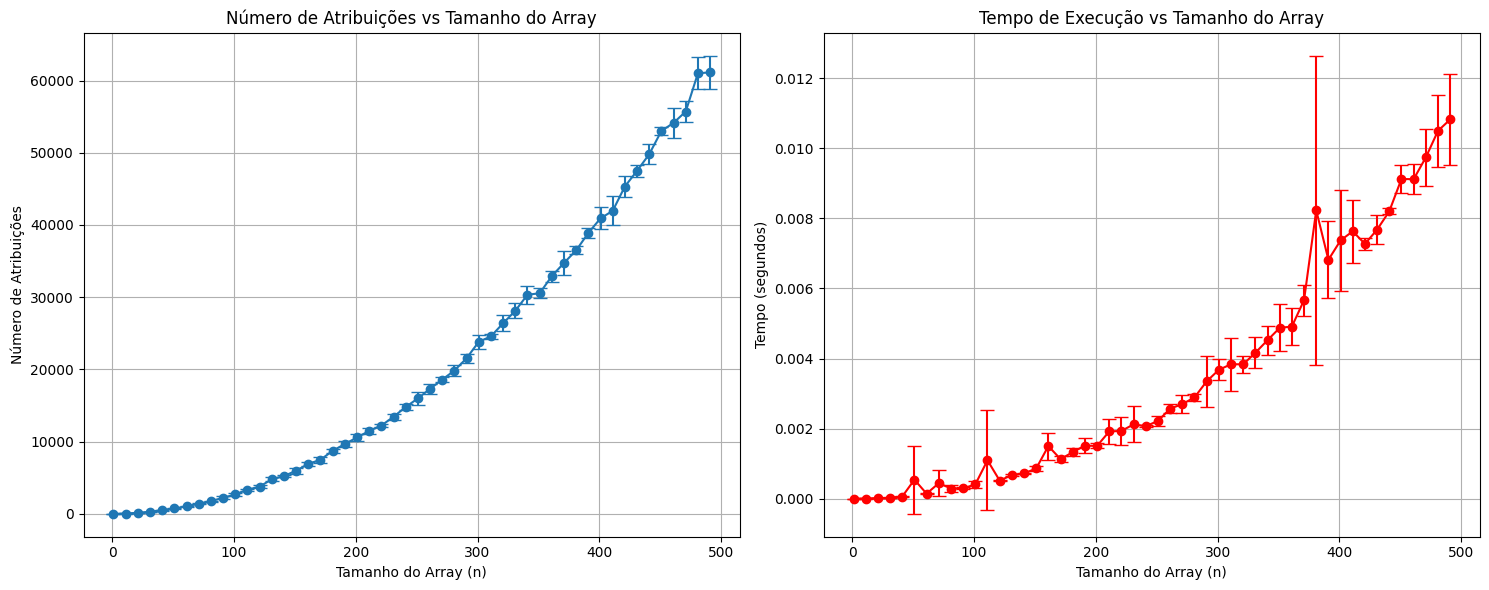


Estatísticas finais:
Maior número médio de atribuições: 61130.40
Maior tempo médio de execução: 0.010824 segundos


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from typing import List, Tuple
import statistics

def insertion_sort(arr: List[int]) -> Tuple[int, float]:
    """
    Implementa o algoritmo Insertion Sort e retorna número de atribuições e tempo de execução
    """
    inicio = time.time()
    contador_atribuicoes = 0
    
    for i in range(1, len(arr)):
        chave = arr[i]
        contador_atribuicoes += 1
        j = i - 1
        while j >= 0 and arr[j] > chave:
            arr[j + 1] = arr[j]
            contador_atribuicoes += 1
            j -= 1
        arr[j + 1] = chave
        contador_atribuicoes += 1
        
    tempo_execucao = time.time() - inicio
    return contador_atribuicoes, tempo_execucao

def gerar_casos_teste(tamanho: int, num_testes: int = 5) -> List[List[int]]:
    """
    Gera múltiplos casos de teste para um dado tamanho
    """
    return [
        [random.randint(1, 1000) for _ in range(tamanho)]
        for _ in range(num_testes)
    ]

def executar_testes_empiricos(tamanhos: np.ndarray, num_testes: int = 5) -> dict:
    """
    Executa testes empíricos e retorna estatísticas
    """
    resultados = {
        'atribuicoes': [],
        'tempos': [],
        'atribuicoes_std': [],
        'tempos_std': []
    }
    
    for n in tamanhos:
        # Gera múltiplos casos de teste
        casos_teste = gerar_casos_teste(n, num_testes)
        
        # Executa os testes
        atribuicoes_teste = []
        tempos_teste = []
        
        for caso in casos_teste:
            atribuicoes, tempo = insertion_sort(caso.copy())
            atribuicoes_teste.append(atribuicoes)
            tempos_teste.append(tempo)
        
        # Calcula médias e desvios padrão
        resultados['atribuicoes'].append(statistics.mean(atribuicoes_teste))
        resultados['tempos'].append(statistics.mean(tempos_teste))
        resultados['atribuicoes_std'].append(statistics.stdev(atribuicoes_teste))
        resultados['tempos_std'].append(statistics.stdev(tempos_teste))
        
    return resultados

def plotar_resultados(tamanhos: np.ndarray, resultados: dict):
    """
    Plota os resultados com barras de erro
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de atribuições
    ax1.errorbar(tamanhos, resultados['atribuicoes'], 
                yerr=resultados['atribuicoes_std'],
                fmt='o-', capsize=5, label='Atribuições')
    ax1.set_title('Número de Atribuições vs Tamanho do Array')
    ax1.set_xlabel('Tamanho do Array (n)')
    ax1.set_ylabel('Número de Atribuições')
    ax1.grid(True)
    
    # Gráfico de tempo
    ax2.errorbar(tamanhos, resultados['tempos'],
                yerr=resultados['tempos_std'],
                fmt='o-', capsize=5, color='red', label='Tempo')
    ax2.set_title('Tempo de Execução vs Tamanho do Array')
    ax2.set_xlabel('Tamanho do Array (n)')
    ax2.set_ylabel('Tempo (segundos)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def main():
    # Configurações do teste
    tamanhos = np.arange(1, 501, 10)
    num_testes = 5  # Número de testes para cada tamanho
    
    # Executa os testes
    print("Iniciando testes empíricos...")
    resultados = executar_testes_empiricos(tamanhos, num_testes)
    
    # Plota os resultados
    print("Plotando resultados...")
    plotar_resultados(tamanhos, resultados)
    
    # Imprime algumas estatísticas
    print("\nEstatísticas finais:")
    print(f"Maior número médio de atribuições: {max(resultados['atribuicoes']):.2f}")
    print(f"Maior tempo médio de execução: {max(resultados['tempos']):.6f} segundos")

if __name__ == "__main__":
    main()